<a href="https://colab.research.google.com/github/LucyMariel/Lucy/blob/master/DIVICNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

After implementing a simple neural network in scratch, we will train and validate it.

The MNIST dataset is used to validate the neural network scratch. It can be downloaded from various libraries and sites, but here we will use Keras, a deep learning framework. You can download the dataset and even extract it by executing the following code.

In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


《What is MNIST?》

This is a standard dataset for image classification and handwritten digit recognition. The dataset contains 60,000 black-and-white images of 28 x 28 pixels for training and 10,000 for testing, along with labels indicating which digits they are from 0 to 9.

《What is image data?》

A digital image is a set of points, which are called pixels. Generally, for a black-and-white image, a pixel contains a value from 0 to 255. On the other hand, a color image contains 0 to 255 values corresponding to R (red), G (green), and B (blue), respectively. In machine learning, each of these 0-255 values is treated as a feature value, and since 0-255 can be represented as an unsigned 8-bit integer, NumPy can hold it as a variable of type "uint8".

Check the dataset
Let's see what the data looks like.

In [2]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

Each data is a black and white image of 28 x 28 pixels.

smoothing
Each image of (1, 28, 28) is converted to (1, 784). The machine learning methods we have learned so far and the neural networks we will be working with in this article, which only have an all-connected layer, will be handled in this form. The fact that all pixels are in a row is called "flattened".

《sample code》

In [3]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

《 Supplemental information 》

As we have been learning about machine learning, we have referred to the number of features as "dimensions". From that perspective, MNIST is 784 dimensional data. On the other hand, the state where the NumPy shape is (784,) is also called a 1-dimensional array. If the state of (28, 28) has the information of height and width as an image, it is a 2-dimensional array. From this perspective, the data is two-dimensional. Furthermore, if it is a color image, then it is (28, 28, 3), which is a 3-dimensional array. In the previous viewpoint, the data is 3-dimensional. However, from the perspective that both black-and-white and color images are flat images and not three-dimensional data, they are two-dimensional data. Note that the word "dimension" is thus used with multiple connotations when dealing with image data.

Visualization of image data
Visualize image data. Pass toplt.imshow.

《sample code》

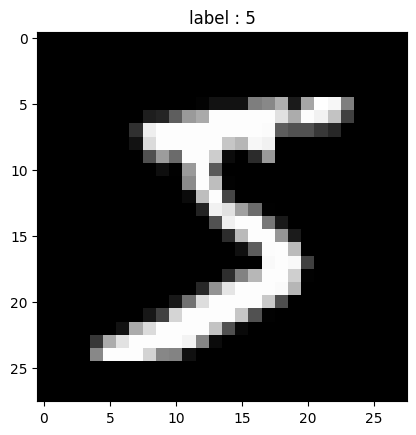

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

link: numpy.reshape — NumPy v1.17 Manual

link: matplotlib.pyplot.imshow — Matplotlib 3.1.1 documentation

《Developmental Topic》

Image data is typically held in unsigned 8-bit integer type uint8, but plt.imshowcan display a more flexible array as an image. For example, a floating point of type float64 with negative values as shown below will not cause an error and will be displayed in exactly the same way as before.

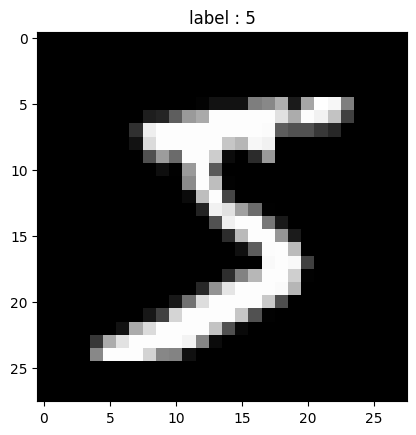

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [7]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
image = X_train[index].reshape(28, 28)
image = image.astype(float)  # Convert to float type
image -= 105.35  # Intentionally try to create a negative decimal value

plt.imshow(image, cmap='gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

print(image)  # Check the value

This is because it is designed to automatically convert the value to an integer between 0 and 255 and process it; even if it is of type uint8, if the minimum value is not 0 and the maximum value is not 255, the tint will be wrong. To prevent this, include the following argument

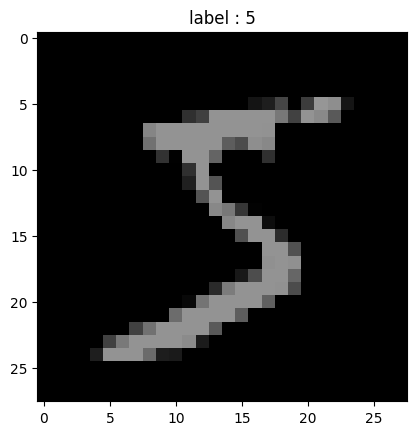

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [10]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
image = X_train[index].reshape(28, 28)
image = image.astype(float)  # Convert to float type
image -= 105.35  # Intentionally try to create a negative decimal value

plt.imshow(image, 'gray', vmin = 0, vmax = 255) #here made adjustments
plt.title('label : {}'.format(y_train[index]))
plt.show()

print(image)  # Check the value

This automatic scaling in image-related libraries can produce unexpected results, so check when using new methods.

pretreatment
Images are represented as uint8 type from 0 to 255, but for machine learning, they are handled as float type from 0 to 1. The following code can be used for conversion.

《sample code》

In [13]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


Also, although the correct answer labels are integers from 0 to 9, they are converted to one-hot expressionswhen performing multi-class classification in a neural network. The code using OneHotEncoderof scikit-learn is as follows. Because the value by this one-hot expression indicates the probability of being the label, it is treated as a float type.

《sample code》

In [14]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


link: sklearn.preprocessing.OneHotEncoder — scikit-learn 0.21.3 documentation

Furthermore, 20% of the 60,000 sheets of training data should be divided as verification data. There will be 48,000 sheets of training data and 12,000 sheets of verification data.

《sample code》

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


Estimation and Visualization

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

# Assuming X_train and y_train are your dataset variables

# Preprocessing
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train /= 255
X_test /= 255

# One-hot encode the labels
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

# Visualize an image
index = 0
image = X_train[index].reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.title('label : {}'.format(np.argmax(y_train[index])))
plt.show()

# Build a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=[Accuracy()])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# Plot the training and validation loss/accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Found array with dim 3. None expected <= 2.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

# Assuming X_train and y_train are your dataset variables

# Preprocessing
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train /= 255
X_test /= 255

# One-hot encode the labels
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = enc.transform(y_test.reshape(-1, 1))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

# Visualize an image
index = 0
image = X_train[index].reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.title('label : {}'.format(np.argmax(y_train[index])))
plt.show()

# Build a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# Plot the training and validation loss/accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [38400, 384000]

Neural network scratch
We will create a neural network class from scratch, using only minimal libraries such as NumPy to implement the algorithm.

This time we will create a 3-layer neural network that performs multi-class classification. We will learn the basics of neural networks with the number of layers fixed. We will make a design that can freely change the layers in the next Sprint.

A template is provided below. Please add your code to this ScratchSimpleNeuralNetrowkClassifier class.

《Model》

In [ ]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    Simple three-layer neural network classifier

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, verbose = True):
        self.verbose = verbose
        pass

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn a neural network classifier.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程などをoutputする
            print()
        pass

    def predict(self, X):
        """
        Estimate using a neural network classifier.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result
        """

        pass
        return

mini-batch processing
Previous machine learning scratches calculated all the samples at once. However, in neural networks, the the stochastic gradient descentmethod, in which data is divided and input, is common. The group when divided is called a mini-batch, and the number of samples is called a Batch size.

In this case, the batch size is set to 20. Since the training data used this time is 48,000 sheets, 48,000 divided by 20 means that 2400 updates will be repeated.In neural networks, this is called 2400 times iterationOnce all the training data is viewed, one epochis over. This epoch is repeated multiple times to complete training.

We have a simple iterator to accomplish this. Call it with a for statement to get a mini-batch.

《code》

In [ ]:
class GetMiniBatch:
    """
Iterator to get a mini-batch

    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    y : The following form of ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

Mini batches can be retrieved by instantiating this class and using a for statement.

In [ ]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # You can get the 5th mini batch
for mini_X_train, mini_y_train in get_mini_batch:
    # You can use a mini batch in this for statement
    pass

Problem 1: Creating code to determine the initial values of the weights.
Create a code to determine the initial values of the weights for each layer of the neural network.

Various methods have been proposed for initializing the weights, but in this case we will use a simple initialization with a Gaussian distribution. The same is true for bias.

Please refer to the following code. The standard deviation value sigma is a hyperparameter. The method of initializing the developmental weights will be covered in the next Sprint.

In [25]:
n_features = 784
n_nodes1 = 400
sigma = 0.01 # Standard deviation of Gaussian distribution
W1 = sigma * np.random.randn(n_features, n_nodes1)
# W1: (784, 400)

Problem 2: Implementation of Forward Propagation
Create a  forward propagation of a three-layer neural network. In the following description, the number of nodes is 400 for the first layer and 200 for the second layer, but may be changed.

The formulas for each layer are shown below. This time, we have also included a description of what ndarray shape each symbol represents in terms of implementation.

batch_size = 20 # batch size
 n_features = 784 # number of features
 n_nodes1 = 400 # number of first layer nodes
 n_nodes2 = 200 # number of second layer nodes
 n_output = 10 # number of output classes (number of nodes in the 3rd layer)

Problem 3 Implementation of Cross-Entropy Error
objective function (loss function).

The cross-entropy error $L$, which is the objective function of the multiclass classification, is the following formula

Problem 4: Back-propagation implementation
Create a three-layer neural network backpropagation. This is the part where the stochastic gradient descent method is performed.

The formula is shown below.

First, here are the updated weights and bias formulas for the i-th layer. For $W_i$ and $B_i$, the updated $W_i^{\prime}$ and $B_i^{\prime}$ are obtained by the following formula

Problem 6 Learning and Estimation
Learn and estimate MNIST data and calculate Accuracy.

Problem 7 Plotting the learning curve
Plot the learning curve.

Since neural networks are prone to over-training, it is important to verify the learning curve. It should be possible to record the loss per epoch (cross-entropy error) for training and validation data.

Problem 8 (Advance Assignment) Confirmation of Misclassification
Identify which images were misclassified. Prepare an estimate and run the following code.

In [ ]:
"""
Display word classification results side by side. The display above the image is "estimated result / correct answer".

Parameters:
----------
y_pred : Estimated ndarray (n_samples,)
y_val : Correct label of verification data (n_samples,)
X_val : Verification data features (n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt

num = 36 # How many to display

true_false = y_pred==y_val
false_list = np.where(true_false==False)[0].astype(np.int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')
